In [1]:
import pandas as pd # naimportovanie kniznice pandas na spracovanie udajov, vstup a vystup suboru CSV
import numpy as np # naimportovanie kniznice numby, pouziva sa pre pracu s polami, maticami...
import matplotlib.pyplot as plt # naimportovanie kniznice matplotlib.pyplot, pouziva sa na vizualizaciu dat
import seaborn as sns # nainportovanie kniznice seaborn, pouziva sa na vizualizaciu dat

# naimportovanie z kniznice sklearn LabelEncoder, ktory sa pouziva na prevedenie/zakodovanie string/retazca na integer/cislo
# odkaz: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder # zakoduje cielove hodnoty s hodnotou od 0 do pocet_hodnot-1

# nainstalujeme kniznicu tenserflow na strojove ucenie
!pip install tensorflow 
# nainstalujeme si kniznicu keras, ktora umoznuje definovat a trenovat modely neuronovych sieti
!pip install keras 

# nainportovanie z kniznice keras np_utils a to_categorical
# prepis do kategorickej premennej, prevedie cele cisla na binarnu maticu
from keras.utils import np_utils 
from keras.utils import to_categorical

# nainportovanie z kniznice sklearn train_test_split, ktory sa pouziva na rozdelenie dat, na trenovacie a testovacie
# odkaz: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# nainportovanie z kniznice sklearn MinMaxScaler, ktory transformuje prvky skalovanim jednotlivych prvkov na dany rozsah 
from sklearn.preprocessing import MinMaxScaler

# nainportovanie z kniznice keras Sequential, ktory sa pouziva na vytvorenie modelu ucenia pri ktorom sa vytvaraju instancie
# triedy Sequential a pridavaju/vytvaraju sa do nej vrstvy modelu
from keras.models import Sequential 
# nainportovanie z kniznice keras Dense
#pomocou Dense su definovane plne spojene vrstvy, kde ako prvy argument sa zadava pocet neuronov alebo uzlov vo vrstve a pomocou
# aktivacneho argumentu urcit aktivacnu funkciu
from keras.layers import Dense 

# kniznice pre graficke zobrazenie modelu 
!pip install pydot
!pip install pydotplus
!pip install graphviz 
from keras.utils import plot_model

In [2]:
# pomocou kniznice pandas mozeme pracovat s classou dataframe
# do premennej 'dataset' sme si nacitali pomocou kniznice pandas vsetky data zo suboru 'weatherAus.csv'
dataset = pd.read_csv("weatherAUS.csv")

# pozrieme sa ako vyzera dataset s ktorym budeme pracovat
dataset.head(15) # zobrazime si prvych 15 zaznamov z datasetu

# Dataset obsahuje denne pozorovania pocasia z mnohych australskych meteorologickych stanic. 
# Cielova premenna RainTomorrow znamena: ci prsalo dalsi den (ano alebo nie)

# Popis stlpcov
# Date = datum pozorovania
# Location = kde je umiestnena meteorologicka stanica 
# MinTemp = minimalna teplota v stupnoch celzia
# MaxTemp = maximalna teplota v stupnoch celzia
# Rainfall = mnoztvo dazdu zaznamenane za den v mm
# Evaporation = vyparovanie za 24h do 9h rana
# Sunshine = pocet hodin jasneho slnecneho ziarenia pocas dna
# WindGustDir = smer najsilnejsieho vetra za poslednych 24h do polnoci
# WindGustSpeed = rychlost najsilnejsieho vetra v km/h za poslednych 24h do polnoci 
# WindDir9am = smer vetra o 9 rana
# WindDir3pm = smer vetra o 15 poobede
# WindSpeed9am = priemerna rychlost vetra v km/h za 10 minut pred 9h rana
# WindSpeed3pm = priemerna rychlost vetra v km/h za 10 minut pred 15h poobede
# Humidity9am = vlhkost v percentach o 9h rana
# Humidity3pm = vlhkost v percentach o 15h poobede
# Pressure9am = atmosfericky tlak v hpa redukovany/znizeny na priemernu hladinu mora o 9h rana
# Pressure3pm = atmosfericky tlak v hpa redukovany/znizeny na priemernu hladinu mora o 15h poobede
# Cloud9am = cast oblohy zakrita oblakmy o 9h rana, meria sa v oktas (ktore su jednotkou osmiciek). Zaznamenava kolko osmiciek
# oblohy zakrivaju oblaky (0 oznacuje uplne jasnu oblohu, 8 znamena ze je uplne zamracene)
# Cloud3pm = cast oblohy zakrita oblakmy o 15h poobede
# Temp9am = teplota v stupnoch celzia o 9h rana
# Temp3pm = teplota v stupnoch celzia o 15h poobede
# RainToday = boolean - je 1 cize pravda ak zrazky/dazd v mm za 24h do 9h rana prekroci 1mm , inak je 0 cize nepravda
# RainTomorrow = cielova premenna, ci zajtra prsalo.

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [3]:
dataset.tail(15) # zobrazime si poslednych 15 zaznamov z datasetu

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145445,2017-06-11,Uluru,2.4,19.1,0.0,NaN,NaN,E,33.0,SE,...,59.0,24.0,1030.0,1026.2,NaN,NaN,8.0,18.8,No,No
145446,2017-06-12,Uluru,5.1,19.7,0.0,NaN,NaN,E,46.0,ESE,...,56.0,29.0,1028.5,1025.8,NaN,NaN,8.5,19.2,No,No
145447,2017-06-13,Uluru,2.5,21.2,0.0,NaN,NaN,ENE,35.0,ESE,...,57.0,32.0,1027.2,1023.0,NaN,NaN,10.3,20.3,No,No
145448,2017-06-14,Uluru,2.3,21.4,0.0,NaN,NaN,SE,22.0,SE,...,60.0,28.0,1026.9,1022.8,NaN,NaN,8.9,20.3,No,No
145449,2017-06-15,Uluru,2.6,22.5,0.0,NaN,NaN,S,19.0,S,...,59.0,24.0,1025.0,1021.4,NaN,NaN,8.8,22.1,No,No
145450,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
145451,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
145452,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
145453,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No


In [4]:
# Prieskum dat
# Ciel prace: musime zistit ci zajtra bude prsat alebo nie
# Ak je dany den 1mm (jeden kubicky milimeter na stvorcovy milimeter) alebo viac (stlpec 'rainfall') tak to znamena, ze zajtra
# bude prsat ak je menej tak nebude prsat (1mm dazd znamena, ze kazda plocha stvorcoveho metra je naplnena vodou s vyskou 1 mm)
# Zistime nasledovne: celkovy pocet dni, pocet dni s najmenej 1 mm alebo viac dazdom, pocet dni s menej ako 1 mm dazda a
# percento dni s dazdom 1mm alebo viac ako 1mm

# Zistime celkovy pocet dni
total_days = len(dataset)
print("Celkovy pocet dni: ", total_days)

# Zistime pocet dni s najmenej 1mm alebo viac dazda
total_at_least_1mm = dataset[dataset.Rainfall >= 1.0].count()[4]
print("Pocet dni s najmenej 1mm dazda: ", total_at_least_1mm)

# Zistime pocet dni s menej ako 1mm dazda
total_less_than_1mm = dataset[dataset.Rainfall < 1.0].count()[4]
print("Pocet dni s menej ako 1mm dazda: ", total_less_than_1mm)

# Zistime percento dni z dazdom 1mm a viac
# Pomocou uz zistenych pocet dni a pocet dni s najmenej ako 1mm dazda
percentage_rainy_days = (float(total_at_least_1mm)*100/float(total_days))
print("Percento dazdivych dni: ", percentage_rainy_days, "%")

Celkovy pocet dni:  145460
Pocet dni s najmenej 1mm dazda:  33639
Pocet dni s menej ako 1mm dazda:  108560
Percento dazdivych dni:  23.12594527705211 %


In [5]:
# Percento nulovych hodnot v kazdom stlpci
dataset.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

In [6]:
# Cistenie datasetu od prazdnych/null hodnot
# Na zaklade prestudovaneho datasetu sme zistili ze stlpce Evaporation, Sunshine, Cloud9am a Cloud3pm obsahuju viac ako 30% null
# hodnoty tak sme sa rozhodli ich odstranit
# Stlpce 'Location' a 'Date' tiez nepotrebujeme tak ich mozme odstranit
dataset = dataset.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm', 'Location', 'Date'], axis=1)

In [7]:
# Skontrolujeme nazvy stlpcov
dataset.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
# Zobrazime si dataset po jeho uprave
dataset.head(15) # zobrazime si prvych 15 zaznamov z upraveneho datasetu
# stale nam zostava vela udajov s ktorymi mozeme pracovat

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
5,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,No
6,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,No
7,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,No
8,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,No,Yes
9,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,Yes,No


In [9]:
# Ak v datasete existuju nulove hodnoty, model ich nebude akceptovat
# Tak nam zostavaju dve moznoti, ze si sami vypocitame nulove hodnoty (ze budeme predpovedat pomocou roznych metod), alebo
# odstranime riadky kde sa nachadzaju nulove hodnoty co je ten lahsi pristup
# Kedze riadky v ocistenom datasete neobsahuju vela nulovych hodnot, nema zmisel ich predpovedat, tak ich odstranime
dataset = dataset.dropna(axis=0,how="any") # odstranime kazdy riadok ak v nom existuje aspon jedna nulova hodnota

<ipython-input-10-2df95e055b45>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset.hist(ax=ax)


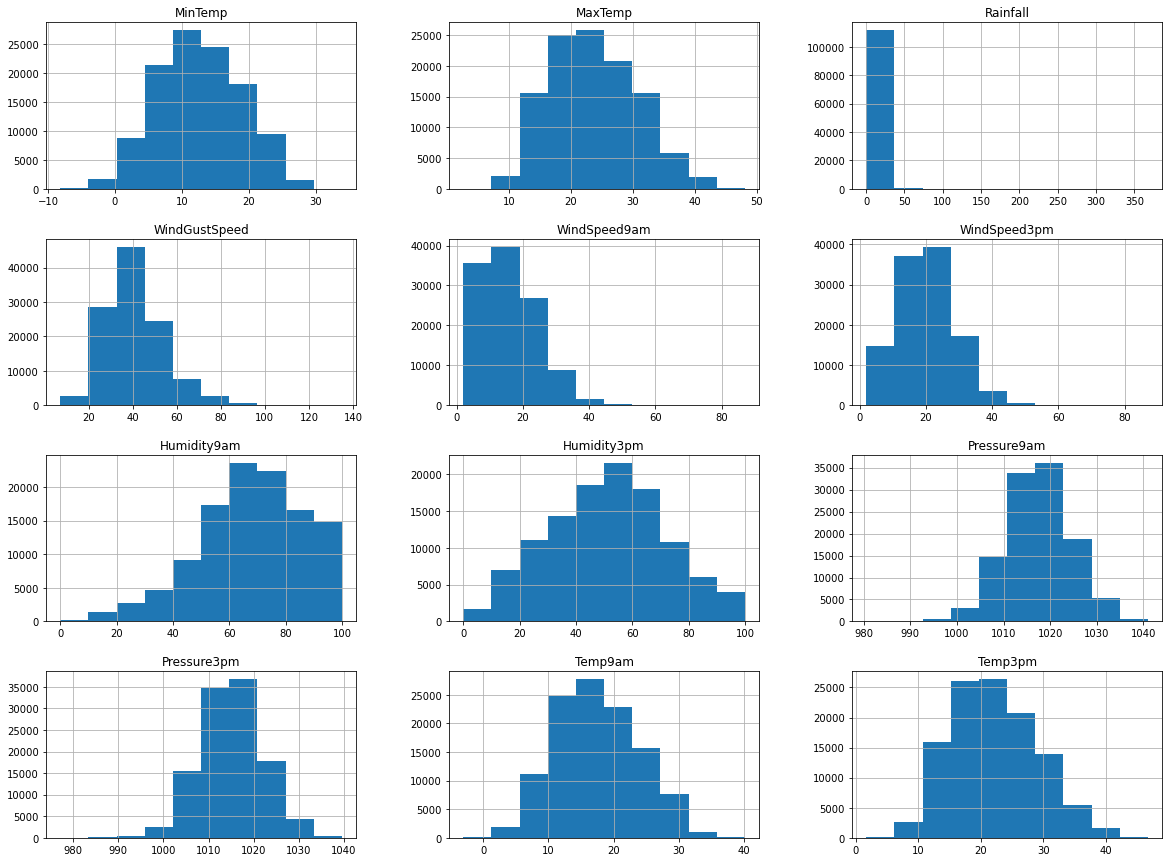

In [10]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

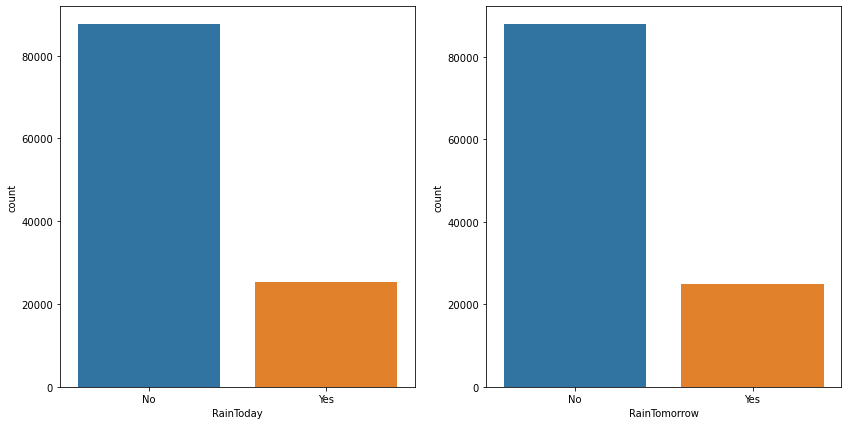

In [11]:
# vizualizacia

# graf zobrazuje pocet kolko dni bude dnes prsat a kolko nie
plt.figure(figsize=(14,7))
plt.subplot(121)
sns.countplot(x=dataset["RainToday"])

# graf zobrazuje pocet kolko dni bude zajtra prsat a kolko nie
plt.subplot(122)
sns.countplot(x=dataset["RainTomorrow"])
plt.show()

array([<AxesSubplot:ylabel='RainToday'>], dtype=object)

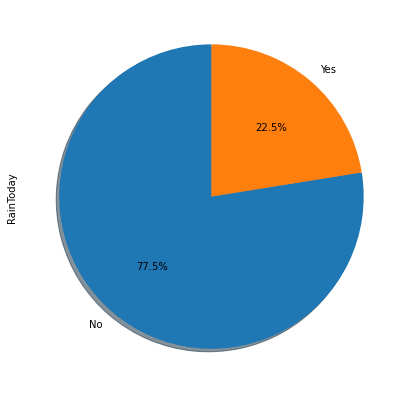

In [12]:
# graf zobrazuje pocet kolko dni bude dnes prsat a kolko nie
dataset.RainToday.value_counts().plot(kind='pie', subplots=True, shadow = True,startangle=90, 
                                         figsize=(12,7), autopct='%1.1f%%')

array([<AxesSubplot:ylabel='RainTomorrow'>], dtype=object)

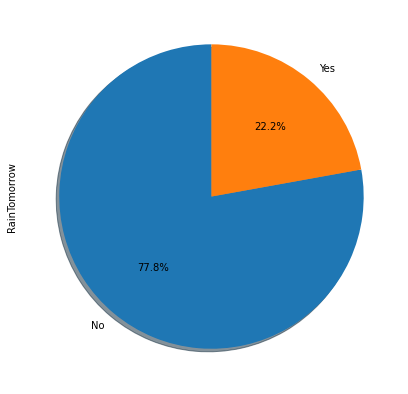

In [13]:
# graf zobrazuje pocet kolko dni bude zajtra prsat a kolko nie
dataset.RainTomorrow.value_counts().plot(kind='pie', subplots=True, shadow = True,startangle=90, 
                                         figsize=(12,7), autopct='%1.1f%%')

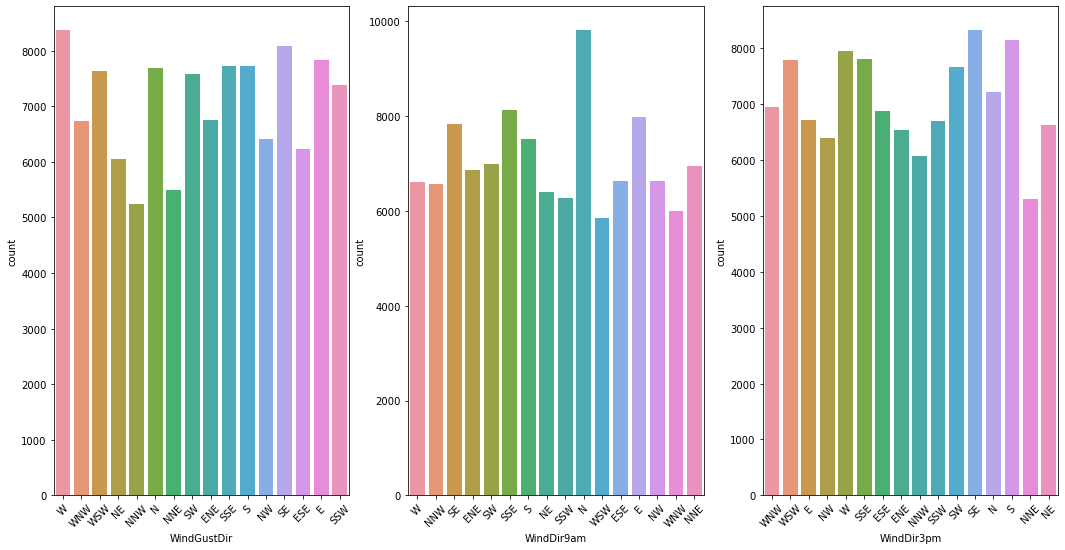

In [14]:
#
plt.figure(figsize=(18,9))
plt.subplot(131)
sns.countplot(x = dataset['WindGustDir'])
plt.xticks(rotation=45)
#
plt.subplot(132)
sns.countplot(x = dataset['WindDir9am'])
plt.xticks(rotation=45)
#
plt.subplot(133)
sns.countplot(x = dataset['WindDir3pm' ])
plt.xticks(rotation=45)

plt.show()

In [15]:
# Rozdelime si data
X = dataset.iloc[:, :-1].values # do premennej X si zobereme vsetky stlpce okrem posledneho stlpca
y = dataset.iloc[:, -1].values # do premennej y si zobereme posledny stlpec
print(X) # ukazka vsektych stlpcov okrem posledneho
print(y) # ukazka posledneho stlpca

[[13.4 22.9 0.6 ... 16.9 21.8 'No']
 [7.4 25.1 0.0 ... 17.2 24.3 'No']
 [12.9 25.7 0.0 ... 21.0 23.2 'No']
 ...
 [3.6 25.3 0.0 ... 10.9 24.5 'No']
 [5.4 26.9 0.0 ... 12.5 26.1 'No']
 [7.8 27.0 0.0 ... 15.1 26.0 'No']]
['No' 'No' 'No' ... 'No' 'No' 'No']


In [16]:
X[0] # ukazka nulteho riadku v premennej X

array([13.4, 22.9, 0.6, 'W', 44.0, 'W', 'WNW', 20.0, 24.0, 71.0, 22.0,
       1007.7, 1007.1, 16.9, 21.8, 'No'], dtype=object)

In [17]:
# Ako co vidime hore v ukazke 'X[0]', premenna X obsahuje retazce v niekotrych stlpcoch
# vsetky stlpce kde je retazec/stringova hodnota si prevedieme/zakodujeme hodnoty s hodnotou od 0 do pocet_hodnot-1 pomocou 
# kniznice LabelEncoder 
label_encoder = LabelEncoder() # zadefinujeme si label_encoder
# prevod
X[:,3] = label_encoder.fit_transform(X[:,3]) # prevod tretieho stlpca 'WindGustDir' na cisla
X[:,5] = label_encoder.fit_transform(X[:,5]) # prevod piateho stlpca 'WindDir9am' na cisla
X[:,6] = label_encoder.fit_transform(X[:,6]) # prevod siesteho stlpca 'WindDir3pm' na cisla
X[:,-1] = label_encoder.fit_transform(X[:,-1]) # prevod posledneho stlpca 'RainToday' na cisla

# premenna y obsahuje same retazce/ stringove hodnoty tak si aj posledny stlpec prevedieme na cisla
y = label_encoder.fit_transform(y)

In [18]:
# Ukazka premmenej X nulteho riadku po prevode/zakodovany retazce na cisla
X[0] # ako co vidime vsetky hodnoty su cisla a mozeme dalej pracovat

array([13.4, 22.9, 0.6, 13, 44.0, 13, 14, 20.0, 24.0, 71.0, 22.0, 1007.7,
       1007.1, 16.9, 21.8, 0], dtype=object)

In [19]:
y = np_utils.to_categorical(y)

In [20]:
# X,y prvym parametrom je mnozina dat, ktoru sme zvolili na pouzitie
# test_size urcuje velkost testovacej mnoziny, kde sme nastavili 20% dat ako testovacie
# train_size nemusime nadstavit, same sa podla test_size nastavi, v tomto pripade 80% dat je nastavene ako trenovacie
# random_state vykonava nahodne rozdelenie pomocou np.random
# odkaz: https://www.bitdegree.org/learn/train-test-split
# odkaz: https://medium.com/@julie.yin/understanding-the-data-splitting-functions-in-scikit-learn-9ae4046fbd26
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1) 

# Vypis rozdelenia na trenovacie a testovacie data
print("Trenovacia mnozina ma",X_train.shape[0])
print("Testovacia mnozina ma",X_test.shape[0])

Trenovacia mnozina ma 90340
Testovacia mnozina ma 22585


In [21]:
# Normalizacia cisel
# normalizacia sa robi hlavne ked sa hodnoty v datasete velmi lisia, ako v nasom pripade, mame hodnoty napr. 1007.7 a 0.6
# odkaz: https://www.quora.com/Why-do-we-normalize-the-data
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train) # normalizacia cisel v premennej X_train
X_test = scaler.fit_transform(X_test) # normalizacia cisel v premennej X_test
y_train = scaler.fit_transform(y_train) # normalizacia cisel v premennej y_train
y_test = scaler.fit_transform(y_test) # normalizacia cisel v premennej y_test

# ukazka vysledku normalizacie cisel
print(X_train[0]) # ukazka nulteho riadku v premennej X_train

[0.66983373 0.66219239 0.         0.13333333 0.33333333 0.06666667
 0.66666667 0.15294118 0.15294118 0.78       0.26       0.61322314
 0.58484349 0.64203233 0.67333333 0.        ]


In [22]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

# Pridanie zvoleneho modelu
model = Sequential() # vytvorenie modelu

# vstupna vrstva
# X.shape[1] - je pocet stlpcov, v nasom pripade 16, spolu mame 17 (16 vstupov a 1 vystup)
model.add(Dense(1024, activation='relu', input_shape = (X.shape[1],)))

# skryta vrstva
model.add(Dense(256, activation='relu'))

# model.add(Dense(16, activation='relu'))
model.add(Dense(64, activation='relu'))

# vystupna vrstva
model.add(Dense(2, activation='sigmoid'))

# zhrnutie modelu keras
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              17408     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 296,386
Trainable params: 296,386
Non-trainable params: 0
_________________________________________________________________


In [23]:
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-control-neural-network-model-capacity-with-nodes-and-layers/
# https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

# kompliovanie modelu keras
# optimizer - optimalizacny model, my sme si zvolili 'adam'
# 'adam' optimalizacia je metoda stochastickeho gradientoveho zostupu, ktora je zalozena na adaptivnom odhade momentov prveho a
#druheho radu odkaz: https://keras.io/api/optimizers/adam/
# https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy
# loss - skalarna hodnota, ktoru sa pocas trenovaniu modelu snazime minimalizovat, 
#my sme si zvolili binary_crossentropy (nase data su 0 a 1)
# metrics - zoznam metrik ktore ma model vyhodnotit pocas testovania 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# trenovanie modelu keras
# X_train a y_train su nase data
# validation_split - hodnota medzi 0 a 1, model oddeluje tuto cast trenovacich dat, nebude ich trenovat a na konci kazdej
# iteracie vyhodnoti stratu a akekolvek modelove metriky
# epochs - pocet iteracii
# batch_size - definuje pocet vzoriek, ktore sa budu sirit prostrednictvom siete, podla X_train zistit vypocet delitelov cisla
# verbose - hodnota moze byt 0, 1 alebo 2, ovplyvnuje detailnost vystupu ktoru vidime nizsie 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 50, batch_size = 4517) 

# evaluate the keras model
accuracy = model.evaluate(X_train, y_train)
#print(accuracy*100)

Epoch 1/50
20/20 [==============================] - 8s 319ms/step - loss: 0.5779 - accuracy: 0.7436 - val_loss: 0.4338 - val_accuracy: 0.8170
Epoch 2/50
20/20 [==============================] - 4s 178ms/step - loss: 0.4124 - accuracy: 0.8191 - val_loss: 0.3755 - val_accuracy: 0.8377
Epoch 3/50
20/20 [==============================] - 3s 154ms/step - loss: 0.3725 - accuracy: 0.8412 - val_loss: 0.3668 - val_accuracy: 0.8425
Epoch 4/50
20/20 [==============================] - 3s 125ms/step - loss: 0.3614 - accuracy: 0.8451 - val_loss: 0.3627 - val_accuracy: 0.8435
Epoch 5/50
20/20 [==============================] - 3s 135ms/step - loss: 0.3607 - accuracy: 0.8441 - val_loss: 0.3628 - val_accuracy: 0.8437
Epoch 6/50
20/20 [==============================] - 3s 145ms/step - loss: 0.3581 - accuracy: 0.8446 - val_loss: 0.3577 - val_accuracy: 0.8457
Epoch 7/50
20/20 [==============================] - 3s 152ms/step - loss: 0.3558 - accuracy: 0.8480 - val_loss: 0.3558 - val_accuracy: 0.8469
Epoch 

In [24]:
# https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/
y_pred = model.predict(X_test)
# uspesnost neuronovej siete
score = model.evaluate(X_test, y_test, verbose=1)
print('Presnost modelu je: ',str(round(score[1]*100,2)), '%')
print('Pri strate: ',str(round(score[0]*100,2)), '%')

706/706 [==============================] - 2s 2ms/step - loss: 0.3366 - accuracy: 0.8534
Presnost modelu je:  85.34 %
Pri strate:  33.66 %


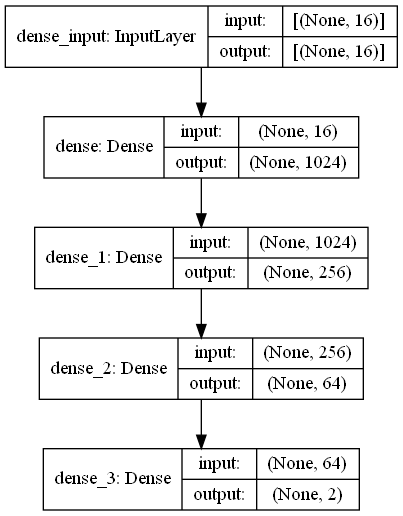

In [25]:
# graficke znazornenie neuronovej siete 
plot_model(model, to_file='model.png', show_shapes= True)

In [26]:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


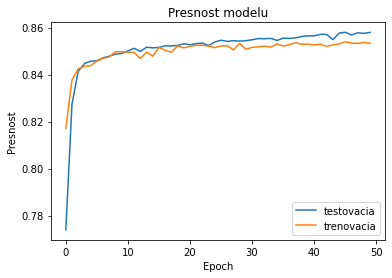

In [27]:
# Graf zobrazujuci presnost modelu
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Presnost modelu')
plt.ylabel('Presnost')
plt.xlabel('Epoch')
plt.legend(['testovacia', 'trenovacia'])
plt.show()

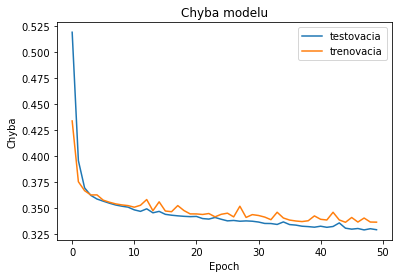

In [28]:
# Graf zobrazujuci chybovost modelu
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Chyba modelu')
plt.ylabel('Chyba')
plt.xlabel('Epoch')
plt.legend(['testovacia', 'trenovacia'])
plt.show()